In [ ]:
!pip install roboflow -q
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 21.7 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Pretrained Model denemesi

In [ ]:
from ultralytics import YOLO
model_pretrained = YOLO("/content/yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.2MB/s]


213kB [00:00, 4.05MB/s]


image 1/1 /content/dunyanin-en-guclu-caddeleri-istiktal-caddesi-de-listede-l5No.jpg: 384x640 11 persons, 1 train, 1 umbrella, 2 handbags, 653.8ms
Speed: 18.1ms preprocess, 653.8ms inference, 29.2ms postprocess per image at shape (1, 3, 384, 640)


array([[[ 41,  54,  76],
        [ 46,  60,  79],
        [ 45,  55,  73],
        ...,
        [ 51,  97, 235],
        [ 46,  84, 240],
        [ 45,  83, 239]],

       [[ 23,  33,  51],
        [ 29,  39,  57],
        [ 31,  39,  56],
        ...,
        [ 50,  95, 236],
        [ 46,  81, 238],
        [ 45,  80, 237]],

       [[ 27,  34,  49],
        [ 30,  37,  52],
        [ 29,  34,  49],
        ...,
        [ 48,  92, 235],
        [ 46,  81, 238],
        [ 46,  81, 238]],

       ...,

       [[  0,   1,   2],
        [  6,   6,   6],
        [  0,   0,   0],
        ...,
        [126,  81,  74],
        [255,  42,   4],
        [255,  42,   4]],

       [[  0,   0,   1],
        [  4,   4,   4],
        [  0,   1,   1],
        ...,
        [151,  71,  58],
        [255,  42,   4],
        [255,  42,   4]],

       [[  1,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]]], dtype=uint8)
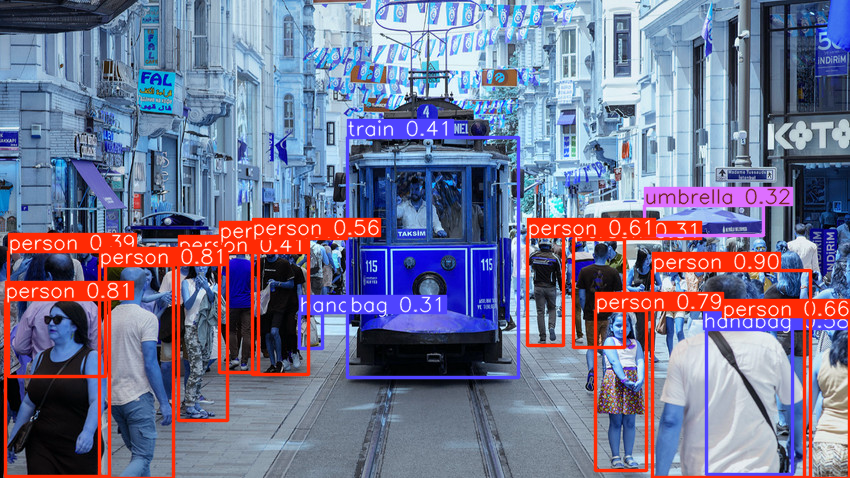

In [ ]:
img_url="https://i.gazeteoksijen.com/2/850/478/storage/files/images/2023/04/19/dunyanin-en-guclu-caddeleri-istiktal-caddesi-de-listede-l5No.jpg"
results = model_pretrained(img_url)

results[0].plot()

Data Download

In [ ]:
!curl -L "https://public.roboflow.com/ds/PRDEXjrWzj?key=oMEXQ6Oo4q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2649      0 --:--:-- --:--:-- --:--:--  2651
100 21.2M  100 21.2M    0     0  17.8M      0  0:00:01  0:00:01 --:--:-- 37.4M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/DJI_0262_JPG.rf.3878c367b5f00b7ce0f5c9bdcb4d8486.jpg  
 extracting: test/images/DJI_0262_JPG.rf.47ce7cf6d8e3e310ab9b2b5c15ebba72.jpg  
 extracting: test/images/DJI_0262_JPG.rf.560b36a2e292c1b3dee7eae7e1f3fbf0.jpg  
 extracting: test/images/DJI_0262_JPG.rf.5f24b2ccccf544d3bb0c3cb740be0f4b.jpg  
 extracting: test/images/DJI_0262_JPG.rf.66b031d30a28587d2c06f38af05cb4ec.jpg  
 extracting: test/images/DJI_0262_JPG.rf.8c378a23b8822f63a44ad24c8787fab3.jpg  
 extracting: test/imag

Model

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/yolo11n.pt")


Train

In [ ]:
results = model.train(
    data='/content/data.yaml',
    epochs=50,
    batch=16,
    name='yolo11n_training'
)


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo11n_training6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/train/labels.cache... 230 images, 0 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo11n_training6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_training6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.89G      1.742      3.805      1.695         48        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         61        150     0.0152      0.536      0.127     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       4.5G       1.74      3.234      1.617         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         61        150     0.0135      0.596      0.139     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.49G      1.746       2.74       1.65         28        640: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         61        150    0.00896      0.595      0.146     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.51G      1.833      2.637      1.686         21        640: 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61        150      0.499      0.373      0.194     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.48G      1.782      2.448      1.672         36        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         61        150      0.829      0.127      0.225      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.51G      1.785      2.357      1.718         27        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         61        150      0.816      0.204      0.309       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.51G      1.765      2.257      1.717         30        640: 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         61        150      0.847      0.225      0.321      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.55G      1.743      2.227      1.656         27        640: 100%|██████████| 15/15 [00:06<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         61        150       0.82      0.215      0.315      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.49G      1.756      2.188      1.681         26        640: 100%|██████████| 15/15 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61        150      0.739      0.316      0.344      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.51G      1.645      1.978      1.599         32        640: 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         61        150      0.518      0.296       0.32      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.49G      1.679      2.119      1.629         33        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         61        150      0.498      0.337      0.312      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.52G      1.681      1.959      1.599         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         61        150      0.515      0.396      0.373      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.49G      1.612      1.858      1.543         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         61        150      0.728      0.362      0.362      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.51G      1.623      1.881      1.579         46        640: 100%|██████████| 15/15 [00:06<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         61        150      0.515      0.385      0.365      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.51G      1.564      1.892      1.542         10        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         61        150      0.579      0.443       0.43      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.52G      1.637      1.905      1.546         21        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         61        150      0.718      0.331      0.418      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.54G      1.542      1.702      1.522         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         61        150        0.6      0.442      0.471      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.52G      1.554      1.716      1.541         42        640: 100%|██████████| 15/15 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         61        150      0.673      0.461       0.47      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.51G       1.58      1.716      1.551         27        640: 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         61        150       0.78      0.443      0.498      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.49G      1.546       1.61      1.494         43        640: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         61        150      0.651      0.376      0.432      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.49G      1.521      1.649      1.485         29        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         61        150      0.643      0.422      0.463      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.56G      1.501      1.564      1.466         46        640: 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         61        150      0.552      0.396      0.425      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.48G      1.483      1.529      1.476         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         61        150      0.756       0.47      0.521       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.49G      1.463      1.562      1.458         24        640: 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         61        150      0.686      0.428      0.501      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.49G      1.487      1.562      1.488         37        640: 100%|██████████| 15/15 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         61        150      0.787      0.448      0.576      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.58G      1.442      1.447      1.445         33        640: 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         61        150      0.789      0.471      0.587      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.49G      1.426      1.476      1.426         27        640: 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         61        150      0.695      0.501      0.569      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.49G      1.412      1.444      1.437         39        640: 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         61        150      0.806      0.437      0.555      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.48G      1.484      1.468      1.484         38        640: 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         61        150      0.789       0.45      0.576       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.48G      1.372      1.377      1.388         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         61        150      0.727      0.469      0.538      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.49G      1.389      1.397        1.4         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         61        150      0.708      0.529      0.624      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.55G      1.389      1.363      1.398         41        640: 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         61        150      0.747      0.506      0.633       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.49G      1.356      1.351      1.369         40        640: 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         61        150      0.761       0.56      0.665      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.49G      1.372       1.32      1.371         35        640: 100%|██████████| 15/15 [00:05<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         61        150       0.63      0.682      0.671      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.51G       1.37      1.349      1.419         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         61        150      0.717      0.623      0.672      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.51G      1.279      1.283      1.358         30        640: 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         61        150      0.672      0.668      0.693      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.51G      1.315      1.264      1.346         24        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         61        150      0.699      0.615      0.676      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.51G      1.296      1.229      1.343         45        640: 100%|██████████| 15/15 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         61        150      0.758      0.539      0.631      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.52G      1.299      1.255      1.347         38        640: 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         61        150      0.779      0.515      0.683      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.51G      1.253      1.234      1.301         36        640: 100%|██████████| 15/15 [00:06<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         61        150      0.632      0.719      0.712      0.388


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.66G      1.269       1.36      1.377         11        640: 100%|██████████| 15/15 [00:05<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         61        150      0.675      0.645      0.678      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.47G      1.251      1.286      1.351         23        640: 100%|██████████| 15/15 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         61        150      0.792       0.69      0.702      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.47G      1.234      1.249      1.353         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         61        150      0.786      0.684       0.72      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.47G      1.171      1.192      1.288         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         61        150      0.746      0.679      0.711      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.52G      1.186      1.211      1.321          7        640: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         61        150      0.772      0.692      0.714      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.47G      1.177        1.2      1.321         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         61        150      0.793      0.715      0.736        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.49G       1.16      1.148      1.308         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         61        150      0.809       0.68      0.732      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.52G      1.115      1.118      1.262         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         61        150      0.804      0.691       0.73      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.47G      1.108      1.103      1.275         15        640: 100%|██████████| 15/15 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61        150      0.818      0.706       0.74      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.49G      1.136       1.11      1.261         21        640: 100%|██████████| 15/15 [00:06<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         61        150      0.811      0.714      0.734      0.384



50 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/yolo11n_training6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_training6/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_training6/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


                   all         61        150      0.793      0.715      0.736      0.401
                  boat          7          7       0.53       0.81      0.709      0.419
                   car          4          6          1      0.312      0.473      0.278
                  dock         50         72      0.788      0.671      0.758      0.386
                jetski         10         11      0.844      0.988      0.903      0.423
                  lift         38         54      0.801      0.796      0.835      0.497
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/yolo11n_training6


Test Step

In [ ]:
metrics = model.val(data='/content/data.yaml',
                     name='yolo11n_val')


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


                   all         61        150       0.79      0.714      0.736      0.402
                  boat          7          7       0.53      0.809      0.709      0.419
                   car          4          6          1      0.312      0.473      0.278
                  dock         50         72      0.775      0.667      0.757      0.389
                jetski         10         11      0.844      0.988      0.903      0.422
                  lift         38         54      0.799      0.796      0.835      0.502
Speed: 1.7ms preprocess, 8.1ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/yolo11n_val2


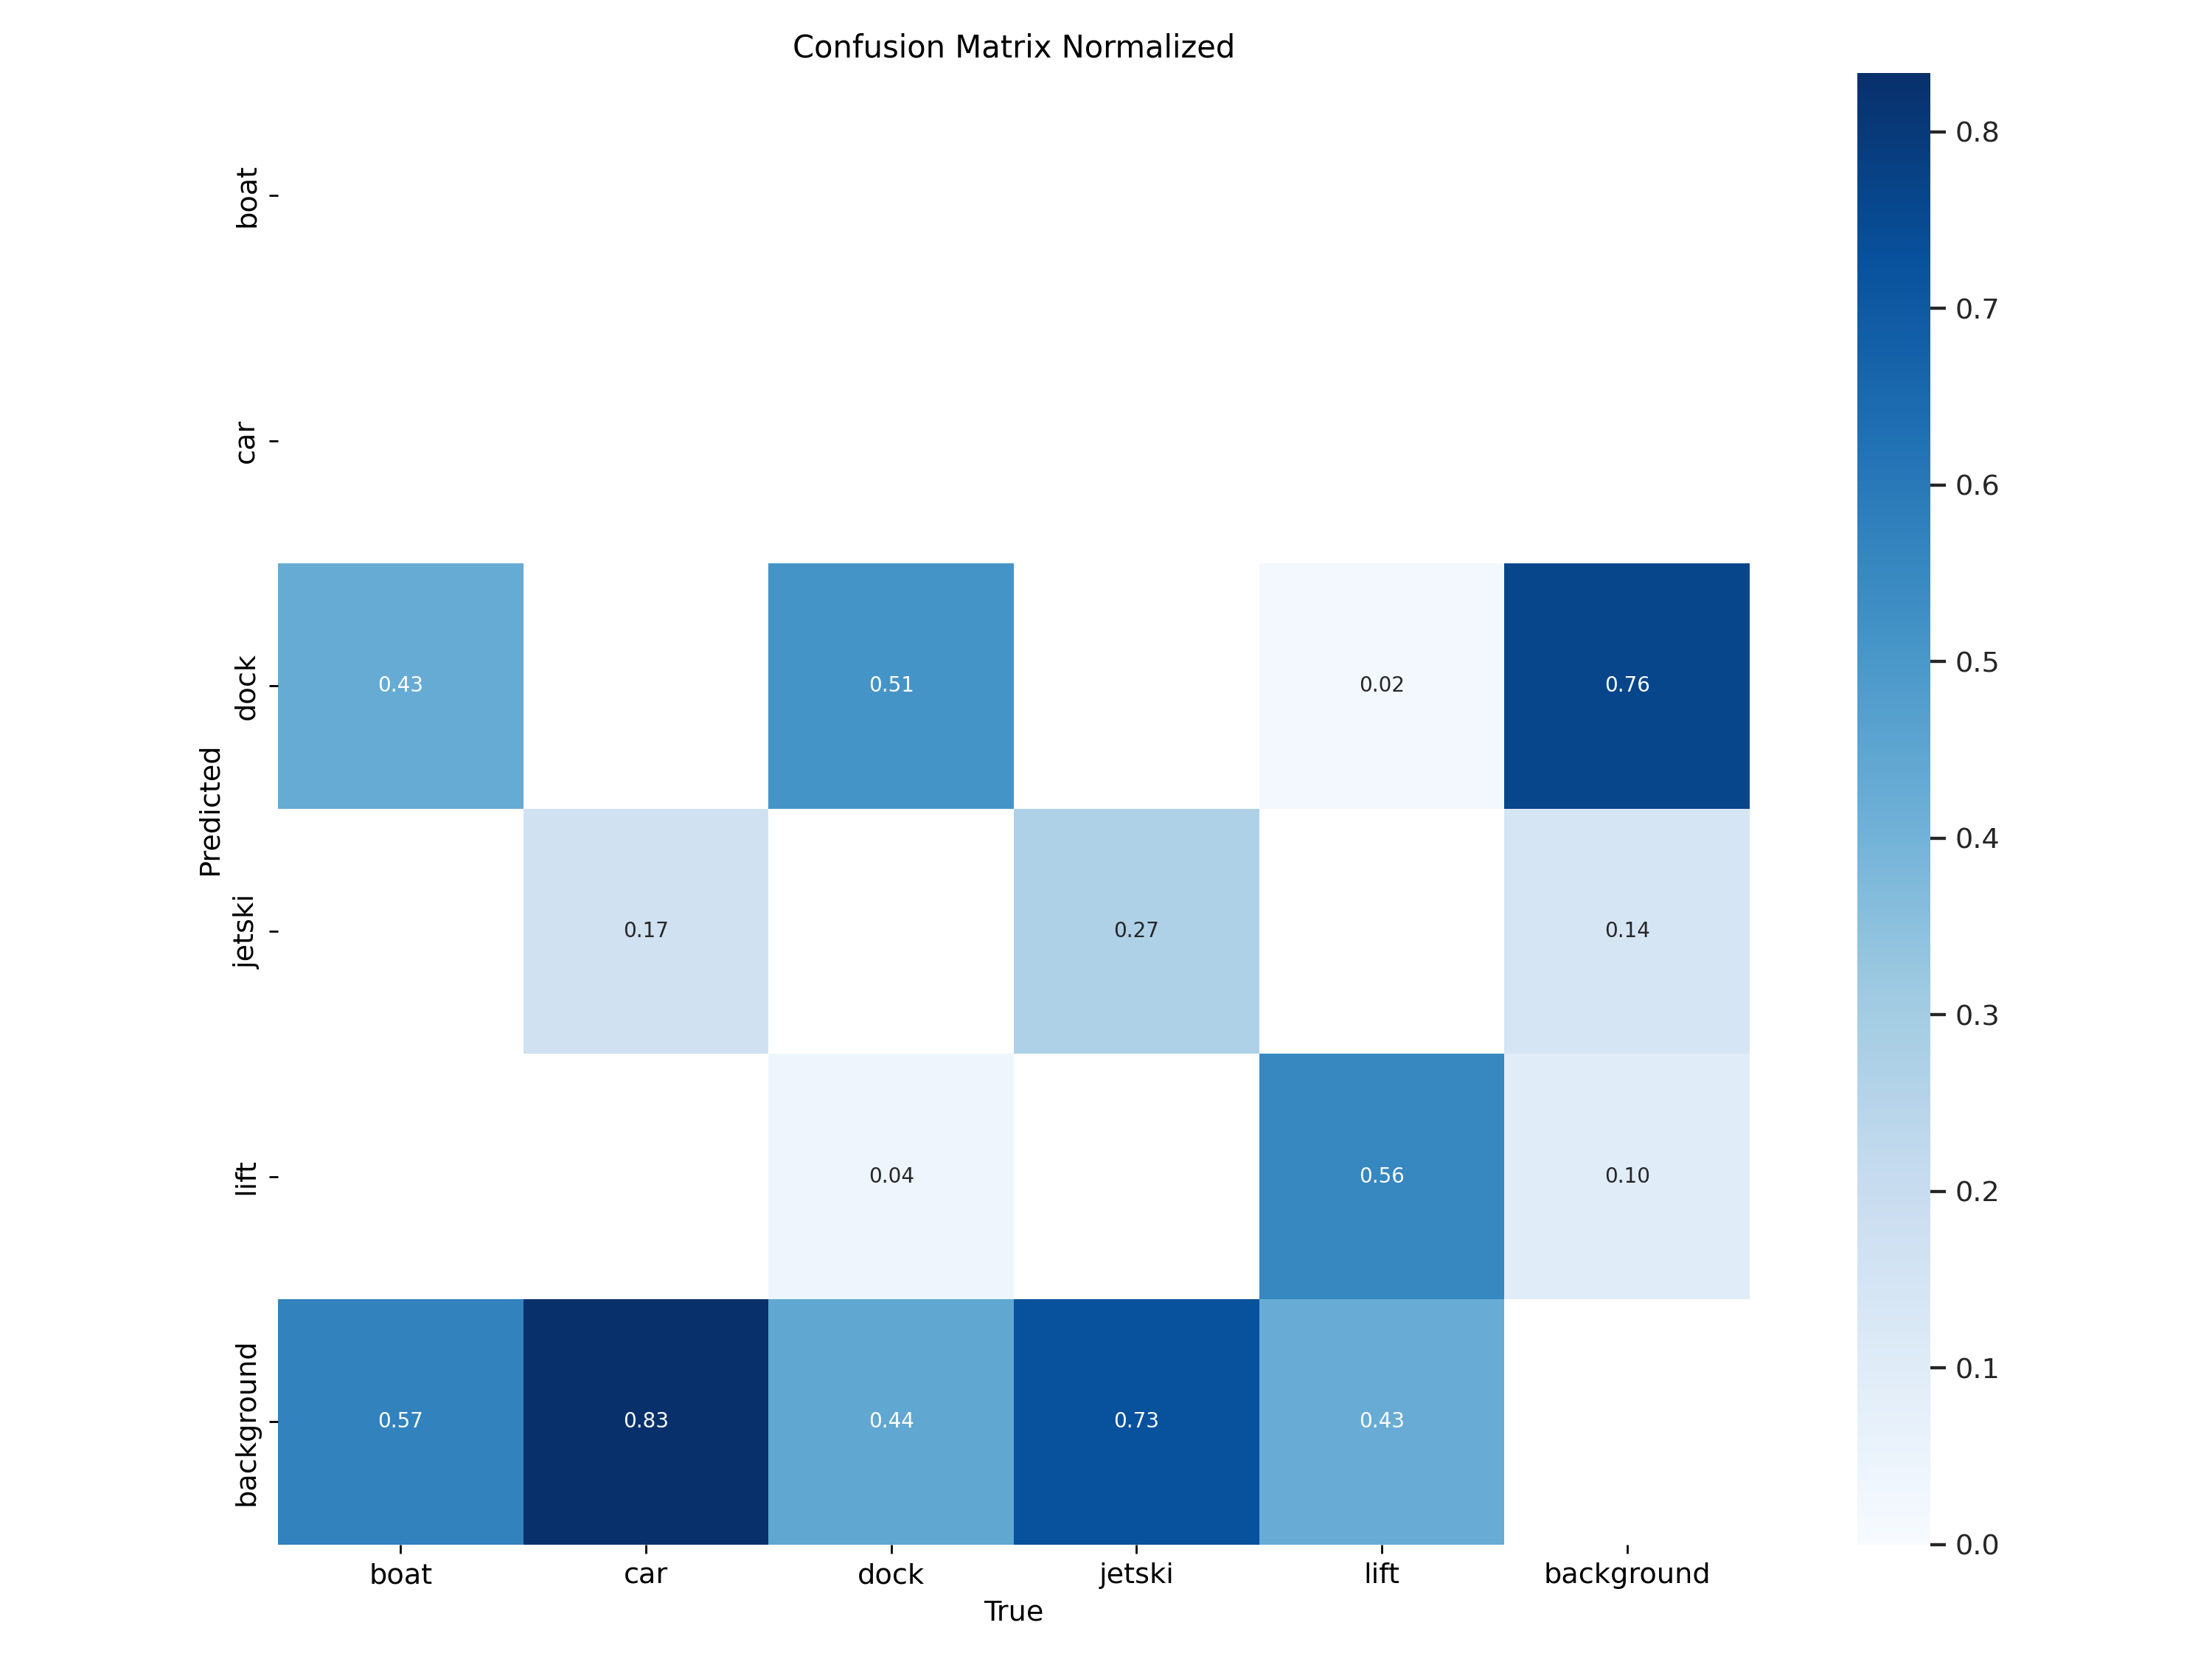

In [ ]:
from IPython.display import Image, display
# Show the training results (like loss, metrics)
display(Image(filename='/content/runs/detect/yolo11n_val/confusion_matrix_normalized.png'))


In [ ]:

pred = model.predict(source="/content/test/images/",
              save=True,
              name='yolo11n_test')


image 1/28 /content/test/images/DJI_0262_JPG.rf.3878c367b5f00b7ce0f5c9bdcb4d8486.jpg: 480x640 (no detections), 55.1ms
image 2/28 /content/test/images/DJI_0262_JPG.rf.47ce7cf6d8e3e310ab9b2b5c15ebba72.jpg: 480x640 (no detections), 14.6ms
image 3/28 /content/test/images/DJI_0262_JPG.rf.560b36a2e292c1b3dee7eae7e1f3fbf0.jpg: 480x640 1 dock, 1 jetski, 1 lift, 14.7ms
image 4/28 /content/test/images/DJI_0262_JPG.rf.5f24b2ccccf544d3bb0c3cb740be0f4b.jpg: 480x640 1 boat, 1 dock, 2 lifts, 10.1ms
image 5/28 /content/test/images/DJI_0262_JPG.rf.66b031d30a28587d2c06f38af05cb4ec.jpg: 480x640 2 docks, 1 jetski, 1 lift, 9.6ms
image 6/28 /content/test/images/DJI_0262_JPG.rf.8c378a23b8822f63a44ad24c8787fab3.jpg: 480x640 1 dock, 1 lift, 15.1ms
image 7/28 /content/test/images/DJI_0262_JPG.rf.ace6b92f0a985e6e7b5ce8f800b2457d.jpg: 480x640 1 dock, 1 jetski, 1 lift, 9.8ms
image 8/28 /content/test/images/DJI_0262_JPG.rf.db0ac6979f1ee032646972240830a550.jpg: 480x640 1 dock, 2 jetskis, 9.6ms
image 9/28 /content/t

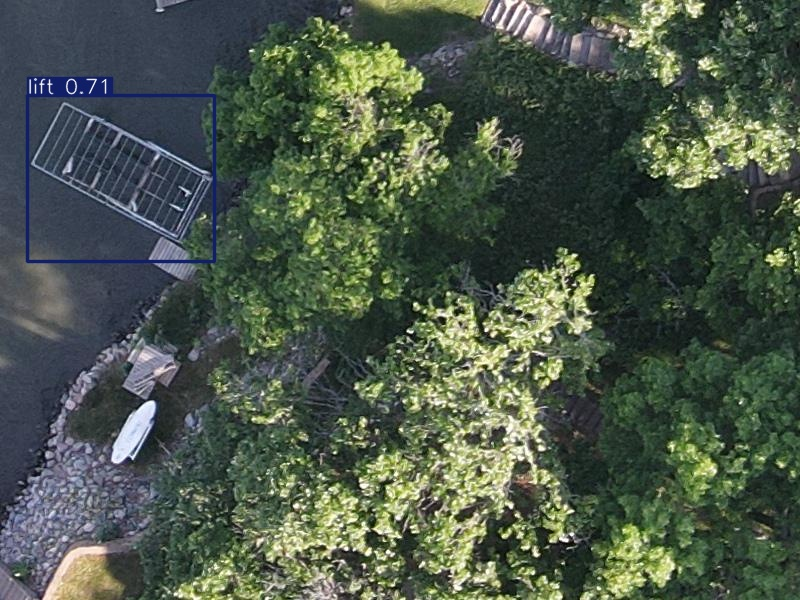

In [ ]:
display(Image(filename='/content/runs/detect/yolo11n_test/DJI_0262_JPG.rf.e495eab7bad50083023383cc09ce2cf6.jpg'))